In [1]:
#importing tenserflow to create the neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pandas as p
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
data = p.read_csv('.\clean_data\creditcard_application_clean_data.csv')
train, test = train_test_split(data, test_size=0.2)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

smote = SMOTE(random_state=31)
x_train_s, y_train_s = smote.fit_resample(x_train,y_train)

In [3]:
def printGraph(title, hist, leg_loc='lower right'):
    acc = hist.history['accuracy']
    val = hist.history['val_accuracy']
    loss = hist.history['loss']
    loss_val = hist.history['val_loss']

    epochs = range(1, len(acc) + 1)
 
    plt.plot(epochs, acc, '-', label='Training accuracy')
    plt.plot(epochs, val, ':', label='Validation accuracy')
    plt.plot(epochs, loss_val, ':', label='Validation loss')
    plt.plot(epochs, loss, '-', label="Loss")
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc=leg_loc)
    plt.grid(linestyle='-',  color='black', visible=True)
    plt.plot()
    print("ACCURACY:        ", acc[-1], "\nVAL ACCURACY:    ", val[-1], "\nVAL LOSS:        ", loss_val[-1] )

def printConfusionMatrix(model, X_test, Y_test, name='model'):
    y_predicted = model.predict(X_test) > 0.5
    mat = confusion_matrix(Y_test, y_predicted)
    labels = ['ACCEPTED', 'DENIED']
 
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

    plt.title(name + " confusion_matrix ")
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')

In [4]:
#there are models from NN_model_3, these two models where the best performing out of the 8

# this is model_3_c_2_a from NN_model_3 file
#has 6 hidden layers
# model_4_A = keras.Sequential(
#     [
#         layers.Dense(256, activation="relu", name="layer_A"),
#         layers.Dense(256, activation="relu", name="layer_B"),
#         layers.Dense(256, activation="relu", name="layer_C"),
#         layers.Dense(256, activation="relu", name="layer_D"),
#         layers.Dense(256, activation="relu", name="layer_E"),
#         layers.Dense(256, activation="relu", name="layer_F"),
#         layers.Dense(1, activation="sigmoid")
#     ]
# )

# # this is model_3_c_2_b from NN_model_3 file
# #has 9 hidden layers
model_4_B = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dense(256, activation="relu", name="layer_E"),
        layers.Dense(256, activation="relu", name="layer_F"),
        layers.Dense(256, activation="relu", name="layer_G"),
        layers.Dense(256, activation="relu", name="layer_H"),
        layers.Dense(256, activation="relu", name="layer_I"),
        layers.Dense(1, activation="sigmoid")
    ]
)

#the models with 12 layers performed very poorly
#12 hidden layers
model_4_B_1 = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dense(256, activation="relu", name="layer_E"),
        layers.Dense(256, activation="relu", name="layer_F"),
        layers.Dense(256, activation="relu", name="layer_G"),
        layers.Dense(256, activation="relu", name="layer_H"),
        layers.Dense(256, activation="relu", name="layer_I"),
        layers.Dense(256, activation="relu", name="layer_J"),
        layers.Dense(256, activation="relu", name="layer_K"),
        layers.Dense(256, activation="relu", name="layer_L"),

        layers.Dense(1, activation="sigmoid")
    ]
)

#Trying to lower Validation loss

Model_4_Drop_02 = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_E"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_F"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_G"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_H"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_I"),
        layers.Dropout(.2),
        layers.Dense(1, activation="sigmoid")
    ]
)

Model_4_Drop_02_ = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_E"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_F"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_G"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_H"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_I"),
        layers.Dropout(.2),
        layers.Dense(1, activation="sigmoid")
    ]
)

Model_4_Drop_02_2 = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_E"),
        layers.Dense(256, activation="relu", name="layer_F"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_G"),
        layers.Dense(256, activation="relu", name="layer_H"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_I"),
        layers.Dense(1, activation="sigmoid")
    ]
)

Model_4_Drop_02_3 = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dropout(.2),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dropout(.2),
        layers.Dense(512, activation="relu", name="layer_E"),
        layers.Dense(64, activation="relu", name="layer_F"),
        layers.Dense(32, activation="relu", name="layer_I"),
        layers.Dense(1, activation="sigmoid")
    ]
)


#the call back
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)
sgd = SGD(learning_rate=0.01, momentum=0.9)
# compiling our models

model_4_B.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_4_B_1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

Model_4_Drop_02_adam = Model_4_Drop_02_
Model_4_Drop_02_sgd = Model_4_Drop_02_

Model_4_Drop_02_adam.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
Model_4_Drop_02_sgd.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [5]:
Model_4_Drop_02_adam_2 = Model_4_Drop_02_2
Model_4_Drop_02_sgd_2 = Model_4_Drop_02_2

Model_4_Drop_02_adam_2.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
Model_4_Drop_02_sgd_2.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [6]:
Model_4_Drop_02_adam_3 = Model_4_Drop_02_3
Model_4_Drop_02_sgd_3 = Model_4_Drop_02_3

Model_4_Drop_02_adam_3.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
Model_4_Drop_02_sgd_3.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [7]:
#.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])
#testing diffrent batch_sizes with the NN_model_3 best performing model

# model_4_B_copy_a = model_4_B batch_size = 128 -> same as NN_model_3
# model_4_B_copy_b = model_4_B batch_size = 64
# model_4_B_copy_c = model_4_B batch_size = 32
# model_4_B_copy_d = model_4_B  Batch_size = 256 

In [8]:
model_4_B_128 = model_4_B

hist = model_4_B_128.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
402/402 [==============================] - 5s 8ms/step - loss: 0.6924 - accuracy: 0.5110 - val_loss: 0.6788 - val_accuracy: 0.7512
Epoch 2/200
402/402 [==============================] - 3s 7ms/step - loss: 0.6881 - accuracy: 0.5308 - val_loss: 0.6737 - val_accuracy: 0.7977
Epoch 3/200
402/402 [==============================] - 3s 7ms/step - loss: 0.6808 - accuracy: 0.5489 - val_loss: 0.6765 - val_accuracy: 0.4945
Epoch 4/200
402/402 [==============================] - 3s 7ms/step - loss: 0.6728 - accuracy: 0.5640 - val_loss: 0.6450 - val_accuracy: 0.6705
Epoch 5/200
402/402 [==============================] - 3s 9ms/step - loss: 0.6691 - accuracy: 0.5709 - val_loss: 0.6348 - val_accuracy: 0.7278
Epoch 6/200
402/402 [==============================] - 3s 8ms/step - loss: 0.6630 - accuracy: 0.5758 - val_loss: 0.6525 - val_accuracy: 0.5293
Epoch 7/200
402/402 [==============================] - 4s 10ms/step - loss: 0.6577 - accuracy: 0.5843 - val_loss: 0.6436 - val_accuracy: 0.647

228/228 [==============================] - 1s 2ms/step


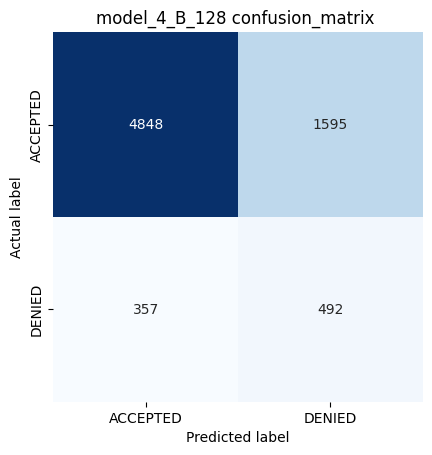

In [9]:
printConfusionMatrix(model_4_B_128,x_test,y_test, name = "model_4_B_128")

ACCURACY:         0.8258951306343079 
VAL ACCURACY:     0.7323094010353088 
VAL LOSS:         0.685721218585968


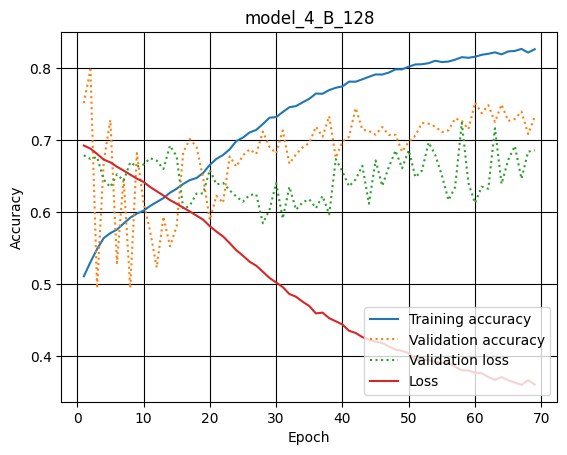

In [10]:
printGraph("model_4_B_128", hist)

In [11]:
model_4_B_64 = model_4_B

hist = model_4_B_64.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=64, verbose=1, callbacks=[callback])

Epoch 1/200
804/804 [==============================] - 6s 7ms/step - loss: 0.4125 - accuracy: 0.7980 - val_loss: 0.6159 - val_accuracy: 0.7248
Epoch 2/200
804/804 [==============================] - 7s 8ms/step - loss: 0.4005 - accuracy: 0.8037 - val_loss: 0.6358 - val_accuracy: 0.7290
Epoch 3/200
804/804 [==============================] - 6s 8ms/step - loss: 0.3945 - accuracy: 0.8076 - val_loss: 0.5975 - val_accuracy: 0.7499
Epoch 4/200
804/804 [==============================] - 7s 8ms/step - loss: 0.3916 - accuracy: 0.8090 - val_loss: 0.6431 - val_accuracy: 0.7356
Epoch 5/200
804/804 [==============================] - 5s 7ms/step - loss: 0.3909 - accuracy: 0.8114 - val_loss: 0.6297 - val_accuracy: 0.7187
Epoch 6/200
804/804 [==============================] - 5s 6ms/step - loss: 0.3869 - accuracy: 0.8111 - val_loss: 0.6412 - val_accuracy: 0.7257
Epoch 7/200
804/804 [==============================] - 6s 7ms/step - loss: 0.3849 - accuracy: 0.8129 - val_loss: 0.5853 - val_accuracy: 0.7474

228/228 [==============================] - 1s 2ms/step


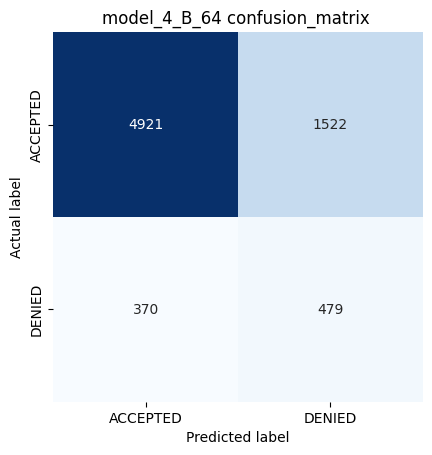

In [12]:
printConfusionMatrix(model_4_B_64,x_test,y_test, name = "model_4_B_64")

ACCURACY:         0.8165844082832336 
VAL ACCURACY:     0.7405375838279724 
VAL LOSS:         0.625834047794342


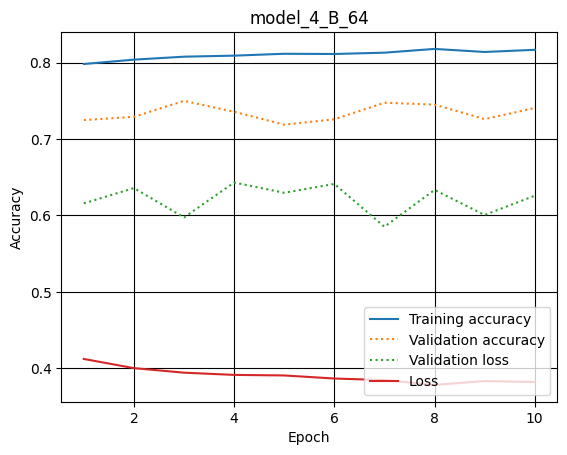

In [13]:
printGraph("model_4_B_64", hist)

In [14]:
model_4_B_32 = model_4_B

hist = model_4_B_32.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=32, verbose=1, callbacks=[callback])

Epoch 1/200
1608/1608 [==============================] - 9s 6ms/step - loss: 0.4378 - accuracy: 0.7830 - val_loss: 0.5829 - val_accuracy: 0.6910
Epoch 2/200
1608/1608 [==============================] - 9s 5ms/step - loss: 0.4246 - accuracy: 0.7901 - val_loss: 0.6295 - val_accuracy: 0.7176
Epoch 3/200
1608/1608 [==============================] - 9s 6ms/step - loss: 0.4263 - accuracy: 0.7892 - val_loss: 0.6464 - val_accuracy: 0.6869
Epoch 4/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.4215 - accuracy: 0.7915 - val_loss: 0.6345 - val_accuracy: 0.7294
Epoch 5/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.4147 - accuracy: 0.7949 - val_loss: 0.6437 - val_accuracy: 0.6868
Epoch 6/200
1608/1608 [==============================] - 11s 7ms/step - loss: 0.4115 - accuracy: 0.7979 - val_loss: 0.5882 - val_accuracy: 0.7167
Epoch 7/200
1608/1608 [==============================] - 12s 8ms/step - loss: 0.4162 - accuracy: 0.7967 - val_loss: 0.5888 - va

228/228 [==============================] - 0s 2ms/step


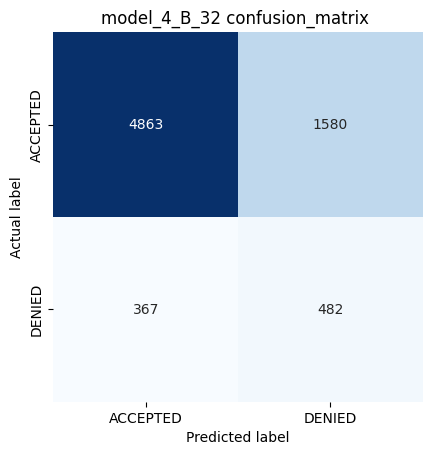

In [15]:
printConfusionMatrix(model_4_B_32,x_test,y_test, name = "model_4_B_32")

ACCURACY:         0.8133382797241211 
VAL ACCURACY:     0.7329950928688049 
VAL LOSS:         0.6075741052627563


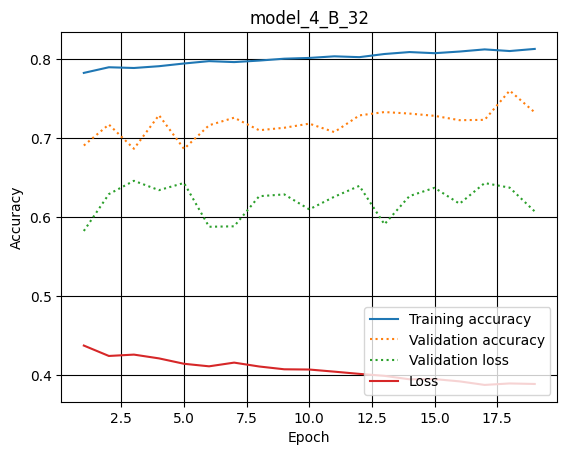

In [16]:
printGraph("model_4_B_32", hist)

In [17]:
model_4_B_256 = model_4_B

hist = model_4_B_256.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=256, verbose=1, callbacks=[callback])

Epoch 1/200
201/201 [==============================] - 2s 11ms/step - loss: 0.3243 - accuracy: 0.8480 - val_loss: 0.6894 - val_accuracy: 0.7558
Epoch 2/200
201/201 [==============================] - 2s 11ms/step - loss: 0.3027 - accuracy: 0.8595 - val_loss: 0.7485 - val_accuracy: 0.7622
Epoch 3/200
201/201 [==============================] - 3s 13ms/step - loss: 0.2952 - accuracy: 0.8629 - val_loss: 0.8360 - val_accuracy: 0.7693
Epoch 4/200
201/201 [==============================] - 3s 14ms/step - loss: 0.2902 - accuracy: 0.8659 - val_loss: 0.8518 - val_accuracy: 0.7703
Epoch 5/200
201/201 [==============================] - 3s 15ms/step - loss: 0.2866 - accuracy: 0.8672 - val_loss: 0.9001 - val_accuracy: 0.7644
Epoch 6/200
201/201 [==============================] - 3s 14ms/step - loss: 0.2860 - accuracy: 0.8667 - val_loss: 0.9115 - val_accuracy: 0.7798
Epoch 7/200
201/201 [==============================] - 3s 14ms/step - loss: 0.2856 - accuracy: 0.8673 - val_loss: 0.9740 - val_accuracy:

228/228 [==============================] - 1s 2ms/step


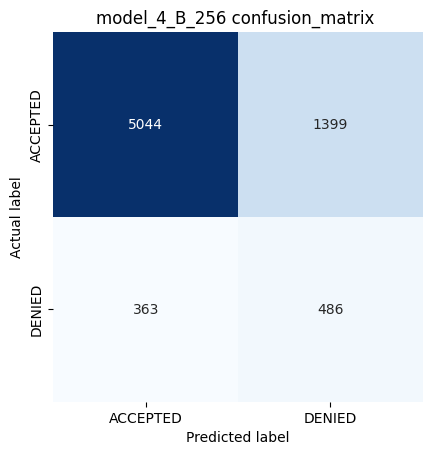

In [18]:
printConfusionMatrix(model_4_B_256,x_test,y_test, name = "model_4_B_256")

ACCURACY:         0.8674532771110535 
VAL ACCURACY:     0.7583653330802917 
VAL LOSS:         0.9555206298828125


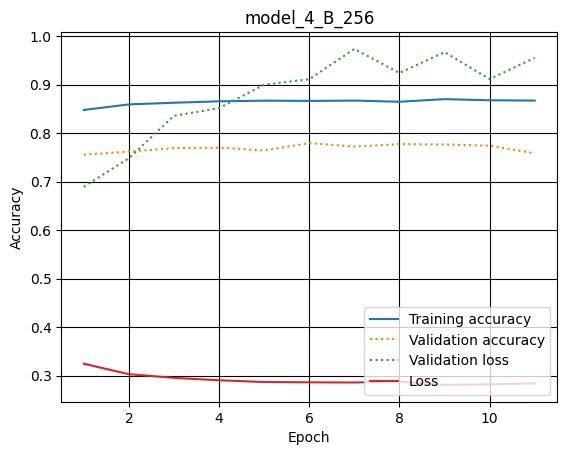

In [19]:
printGraph("model_4_B_256", hist)

===================================================================================================================<h1>Model_4_Drop_02_adam & Model_4_Drop_02_sgd </h1>

In [20]:
hist = Model_4_Drop_02_adam.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=32, verbose=1, callbacks=[callback])

Epoch 1/200
1608/1608 [==============================] - 17s 9ms/step - loss: 0.6936 - accuracy: 0.5032 - val_loss: 0.7086 - val_accuracy: 0.1164
Epoch 2/200
1608/1608 [==============================] - 15s 9ms/step - loss: 0.6931 - accuracy: 0.5098 - val_loss: 0.6644 - val_accuracy: 0.8534
Epoch 3/200
1608/1608 [==============================] - 16s 10ms/step - loss: 0.6922 - accuracy: 0.5199 - val_loss: 0.7397 - val_accuracy: 0.1415
Epoch 4/200
1608/1608 [==============================] - 15s 9ms/step - loss: 0.6919 - accuracy: 0.5207 - val_loss: 0.6755 - val_accuracy: 0.7137
Epoch 5/200
1608/1608 [==============================] - 15s 9ms/step - loss: 0.6910 - accuracy: 0.5268 - val_loss: 0.7263 - val_accuracy: 0.3823
Epoch 6/200
1608/1608 [==============================] - 14s 9ms/step - loss: 0.6899 - accuracy: 0.5331 - val_loss: 0.6808 - val_accuracy: 0.6306
Epoch 7/200
1608/1608 [==============================] - 14s 9ms/step - loss: 0.6894 - accuracy: 0.5334 - val_loss: 0.6851 

228/228 [==============================] - 1s 2ms/step


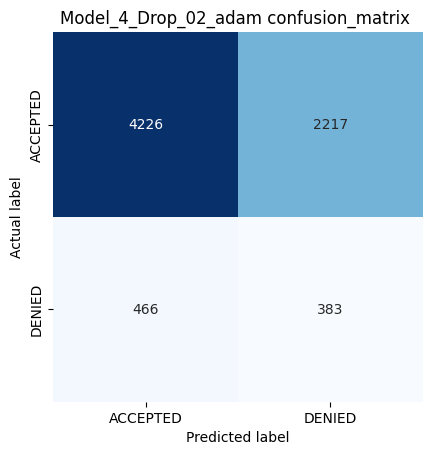

In [21]:
printConfusionMatrix(Model_4_Drop_02_adam,x_test,y_test, name = "Model_4_Drop_02_adam")

ACCURACY:         0.5903277397155762 
VAL ACCURACY:     0.632062554359436 
VAL LOSS:         0.6709209084510803


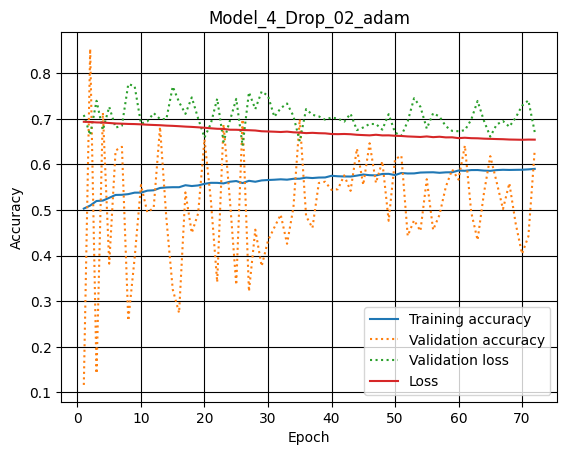

In [22]:
printGraph("Model_4_Drop_02_adam", hist)

In [23]:
hist = Model_4_Drop_02_sgd.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=32, verbose=1, callbacks=[callback])

Epoch 1/200
1608/1608 [==============================] - 13s 8ms/step - loss: 0.6538 - accuracy: 0.5899 - val_loss: 0.7291 - val_accuracy: 0.4462
Epoch 2/200
1608/1608 [==============================] - 14s 9ms/step - loss: 0.6534 - accuracy: 0.5930 - val_loss: 0.6896 - val_accuracy: 0.4798
Epoch 3/200
1608/1608 [==============================] - 13s 8ms/step - loss: 0.6526 - accuracy: 0.5916 - val_loss: 0.6723 - val_accuracy: 0.6011
Epoch 4/200
1608/1608 [==============================] - 14s 9ms/step - loss: 0.6514 - accuracy: 0.5929 - val_loss: 0.6528 - val_accuracy: 0.6166
Epoch 5/200
1608/1608 [==============================] - 14s 9ms/step - loss: 0.6512 - accuracy: 0.5927 - val_loss: 0.7200 - val_accuracy: 0.4462
Epoch 6/200
1608/1608 [==============================] - 13s 8ms/step - loss: 0.6524 - accuracy: 0.5912 - val_loss: 0.6875 - val_accuracy: 0.5247
Epoch 7/200
1608/1608 [==============================] - 14s 8ms/step - loss: 0.6510 - accuracy: 0.5952 - val_loss: 0.6957 -

228/228 [==============================] - 1s 4ms/step


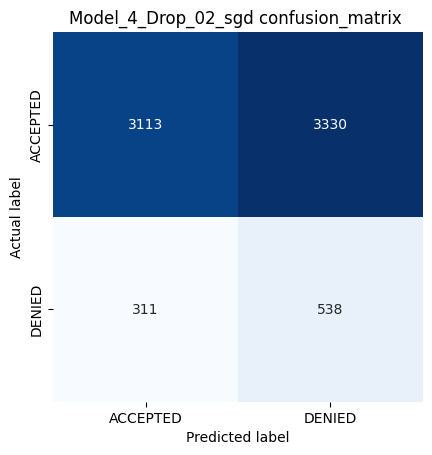

In [24]:
printConfusionMatrix(Model_4_Drop_02_sgd,x_test,y_test, name = "Model_4_Drop_02_sgd")

ACCURACY:         0.5931462049484253 
VAL ACCURACY:     0.5006856918334961 
VAL LOSS:         0.6954123973846436


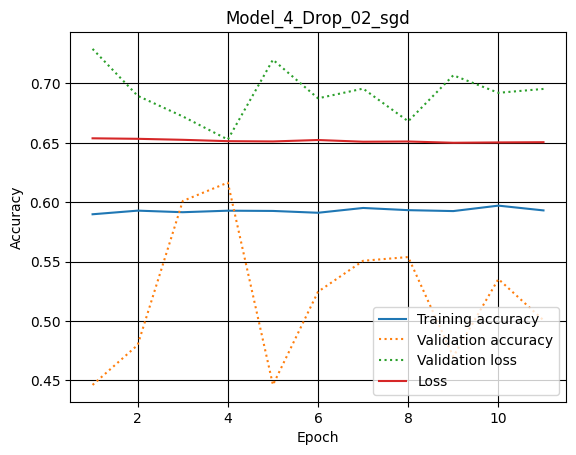

In [25]:
printGraph("Model_4_Drop_02_sgd", hist)

===================================================================================================================<h1>Model_4_Drop_02_adam_2 & Model_4_Drop_02_sgd_2 </h1>

In [26]:
hist = Model_4_Drop_02_adam_2.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=32, verbose=1, callbacks=[callback])

Epoch 1/200
1608/1608 [==============================] - 11s 6ms/step - loss: 0.6931 - accuracy: 0.5075 - val_loss: 0.6820 - val_accuracy: 0.6618
Epoch 2/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.6918 - accuracy: 0.5230 - val_loss: 0.7344 - val_accuracy: 0.3158
Epoch 3/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.6903 - accuracy: 0.5295 - val_loss: 0.7099 - val_accuracy: 0.4722
Epoch 4/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.6891 - accuracy: 0.5327 - val_loss: 0.6534 - val_accuracy: 0.7481
Epoch 5/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.6882 - accuracy: 0.5360 - val_loss: 0.7008 - val_accuracy: 0.4977
Epoch 6/200
1608/1608 [==============================] - 11s 7ms/step - loss: 0.6868 - accuracy: 0.5388 - val_loss: 0.7501 - val_accuracy: 0.4157
Epoch 7/200
1608/1608 [==============================] - 11s 7ms/step - loss: 0.6854 - accuracy: 0.5470 - val_loss: 0.7147 -

228/228 [==============================] - 1s 3ms/step


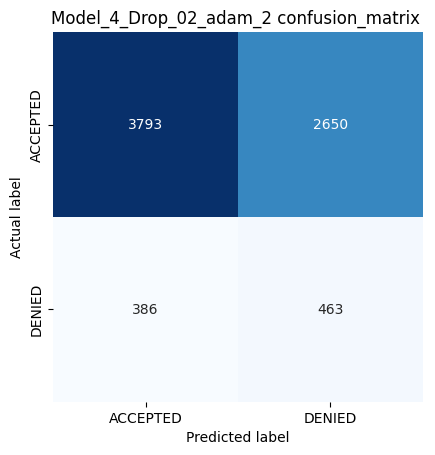

In [27]:
printConfusionMatrix(Model_4_Drop_02_adam_2,x_test,y_test, name = "Model_4_Drop_02_adam_2")

ACCURACY:         0.6273373961448669 
VAL ACCURACY:     0.5836533308029175 
VAL LOSS:         0.6659322381019592


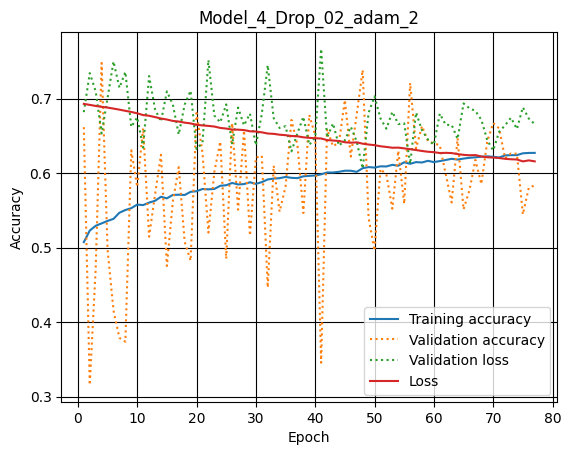

In [28]:
printGraph("Model_4_Drop_02_adam_2", hist)

In [29]:
hist = Model_4_Drop_02_sgd_2.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=32, verbose=1, callbacks=[callback])

Epoch 1/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.6140 - accuracy: 0.6303 - val_loss: 0.7229 - val_accuracy: 0.5160
Epoch 2/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.6149 - accuracy: 0.6261 - val_loss: 0.6622 - val_accuracy: 0.6367
Epoch 3/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.6131 - accuracy: 0.6302 - val_loss: 0.6979 - val_accuracy: 0.5983
Epoch 4/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.6132 - accuracy: 0.6295 - val_loss: 0.6800 - val_accuracy: 0.6443
Epoch 5/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.6117 - accuracy: 0.6322 - val_loss: 0.6375 - val_accuracy: 0.6425
Epoch 6/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.6113 - accuracy: 0.6311 - val_loss: 0.6621 - val_accuracy: 0.5363
Epoch 7/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.6111 - accuracy: 0.6303 - val_loss: 0.6878 -

228/228 [==============================] - 1s 3ms/step


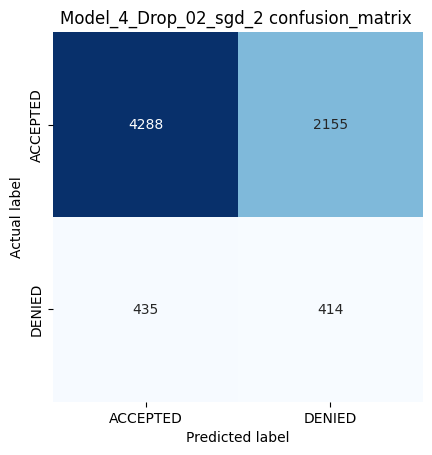

In [30]:
printConfusionMatrix(Model_4_Drop_02_sgd_2,x_test,y_test, name = "Model_4_Drop_02_sgd_2")

ACCURACY:         0.6478443145751953 
VAL ACCURACY:     0.6448162198066711 
VAL LOSS:         0.633399486541748


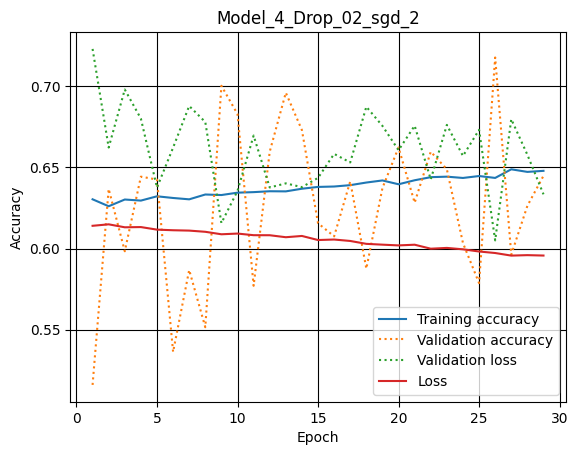

In [31]:
printGraph("Model_4_Drop_02_sgd_2", hist)

===================================================================================================================<h1>Model_4_Drop_02_adam_3 & Model_4_Drop_02_sgd_3 </h1>

In [32]:
hist = Model_4_Drop_02_adam_3.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=32, verbose=1, callbacks=[callback])

Epoch 1/200
1608/1608 [==============================] - 9s 5ms/step - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.7147 - val_accuracy: 0.1821
Epoch 2/200
1608/1608 [==============================] - 7s 5ms/step - loss: 0.6917 - accuracy: 0.5214 - val_loss: 0.7166 - val_accuracy: 0.3363
Epoch 3/200
1608/1608 [==============================] - 7s 5ms/step - loss: 0.6899 - accuracy: 0.5292 - val_loss: 0.7441 - val_accuracy: 0.3884
Epoch 4/200
1608/1608 [==============================] - 7s 4ms/step - loss: 0.6882 - accuracy: 0.5361 - val_loss: 0.6422 - val_accuracy: 0.8044
Epoch 5/200
1608/1608 [==============================] - 7s 5ms/step - loss: 0.6869 - accuracy: 0.5390 - val_loss: 0.6842 - val_accuracy: 0.5384
Epoch 6/200
1608/1608 [==============================] - 9s 6ms/step - loss: 0.6851 - accuracy: 0.5503 - val_loss: 0.7675 - val_accuracy: 0.3600
Epoch 7/200
1608/1608 [==============================] - 9s 6ms/step - loss: 0.6833 - accuracy: 0.5508 - val_loss: 0.7407 - val_ac

228/228 [==============================] - 1s 3ms/step


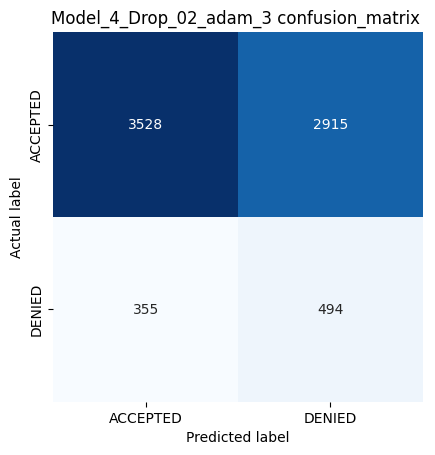

In [33]:
printConfusionMatrix(Model_4_Drop_02_adam_3,x_test,y_test, name = "Model_4_Drop_02_adam_3")

ACCURACY:         0.640108048915863 
VAL ACCURACY:     0.5515633821487427 
VAL LOSS:         0.6718840003013611


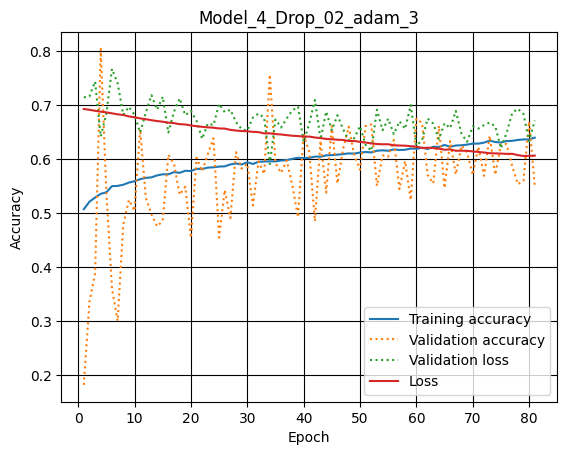

In [34]:
printGraph("Model_4_Drop_02_adam_3", hist)

In [35]:
hist = Model_4_Drop_02_sgd_3.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=32, verbose=1, callbacks=[callback])

Epoch 1/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.6058 - accuracy: 0.6354 - val_loss: 0.6397 - val_accuracy: 0.6215
Epoch 2/200
1608/1608 [==============================] - 8s 5ms/step - loss: 0.6039 - accuracy: 0.6390 - val_loss: 0.6539 - val_accuracy: 0.6570
Epoch 3/200
1608/1608 [==============================] - 11s 7ms/step - loss: 0.6031 - accuracy: 0.6390 - val_loss: 0.6652 - val_accuracy: 0.6168
Epoch 4/200
1608/1608 [==============================] - 10s 6ms/step - loss: 0.6030 - accuracy: 0.6422 - val_loss: 0.6632 - val_accuracy: 0.6281
Epoch 5/200
1608/1608 [==============================] - 9s 5ms/step - loss: 0.6017 - accuracy: 0.6425 - val_loss: 0.7071 - val_accuracy: 0.5352
Epoch 6/200
1608/1608 [==============================] - 10s 7ms/step - loss: 0.6008 - accuracy: 0.6428 - val_loss: 0.6534 - val_accuracy: 0.6360
Epoch 7/200
1608/1608 [==============================] - 15s 9ms/step - loss: 0.5990 - accuracy: 0.6439 - val_loss: 0.6407 - v

228/228 [==============================] - 1s 3ms/step


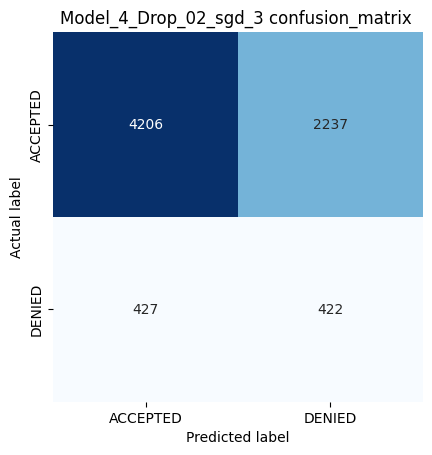

In [36]:
printConfusionMatrix(Model_4_Drop_02_sgd_3,x_test,y_test, name = "Model_4_Drop_02_sgd_3")

ACCURACY:         0.6576604843139648 
VAL ACCURACY:     0.6346681118011475 
VAL LOSS:         0.6545237898826599


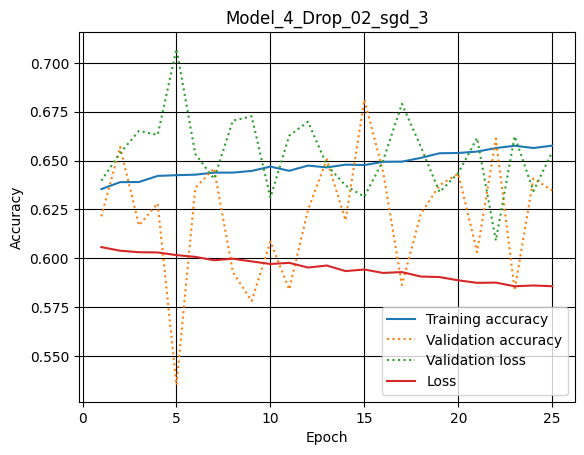

In [37]:
printGraph("Model_4_Drop_02_sgd_3", hist)

========================================================================================================<h1>Other</h1>

In [43]:
Model_4_Drop_02_adam_128 = Model_4_Drop_02_3
Model_4_Drop_02_sgd_128 = Model_4_Drop_02_3

Model_4_Drop_02_adam_128.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
Model_4_Drop_02_sgd_128.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [44]:
hist = Model_4_Drop_02_adam_128.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
402/402 [==============================] - 7s 14ms/step - loss: 0.5662 - accuracy: 0.6757 - val_loss: 0.6542 - val_accuracy: 0.6288
Epoch 2/200
402/402 [==============================] - 5s 11ms/step - loss: 0.5597 - accuracy: 0.6808 - val_loss: 0.6507 - val_accuracy: 0.6443
Epoch 3/200
402/402 [==============================] - 5s 11ms/step - loss: 0.5560 - accuracy: 0.6828 - val_loss: 0.6436 - val_accuracy: 0.6659
Epoch 4/200
402/402 [==============================] - 5s 13ms/step - loss: 0.5547 - accuracy: 0.6842 - val_loss: 0.6568 - val_accuracy: 0.6382
Epoch 5/200
402/402 [==============================] - 6s 16ms/step - loss: 0.5544 - accuracy: 0.6840 - val_loss: 0.6413 - val_accuracy: 0.6626
Epoch 6/200
402/402 [==============================] - 5s 12ms/step - loss: 0.5516 - accuracy: 0.6856 - val_loss: 0.6513 - val_accuracy: 0.6563
Epoch 7/200
402/402 [==============================] - 5s 12ms/step - loss: 0.5505 - accuracy: 0.6856 - val_loss: 0.6522 - val_accuracy:

228/228 [==============================] - 1s 2ms/step


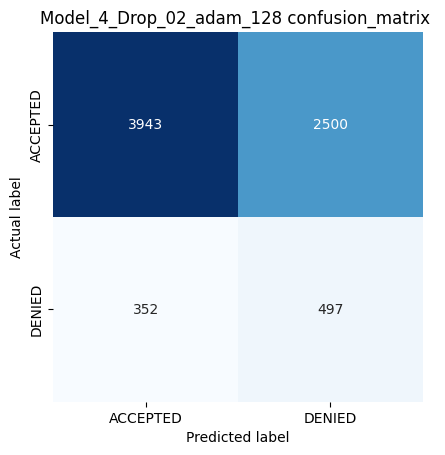

In [45]:
printConfusionMatrix(Model_4_Drop_02_adam_128,x_test,y_test, name = "Model_4_Drop_02_adam_128")

ACCURACY:         0.694786787033081 
VAL ACCURACY:     0.6088864803314209 
VAL LOSS:         0.6646103858947754


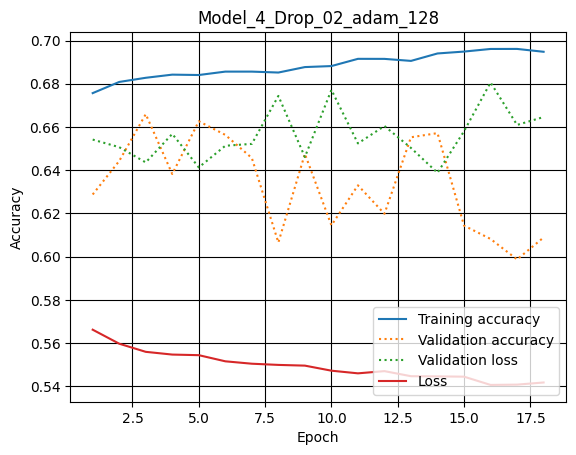

In [46]:
printGraph("Model_4_Drop_02_adam_128", hist)

In [47]:
hist = Model_4_Drop_02_sgd_128.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
402/402 [==============================] - 3s 9ms/step - loss: 0.5380 - accuracy: 0.7001 - val_loss: 0.6380 - val_accuracy: 0.6532
Epoch 2/200
402/402 [==============================] - 4s 9ms/step - loss: 0.5380 - accuracy: 0.6985 - val_loss: 0.6363 - val_accuracy: 0.6621
Epoch 3/200
402/402 [==============================] - 4s 9ms/step - loss: 0.5383 - accuracy: 0.7003 - val_loss: 0.6436 - val_accuracy: 0.6452
Epoch 4/200
402/402 [==============================] - 4s 10ms/step - loss: 0.5370 - accuracy: 0.7018 - val_loss: 0.6407 - val_accuracy: 0.6451
Epoch 5/200
402/402 [==============================] - 4s 9ms/step - loss: 0.5357 - accuracy: 0.7020 - val_loss: 0.6515 - val_accuracy: 0.6417
Epoch 6/200
402/402 [==============================] - 4s 9ms/step - loss: 0.5351 - accuracy: 0.7040 - val_loss: 0.6241 - val_accuracy: 0.6812
Epoch 7/200
402/402 [==============================] - 4s 9ms/step - loss: 0.5350 - accuracy: 0.7021 - val_loss: 0.6115 - val_accuracy: 0.682

228/228 [==============================] - 1s 4ms/step


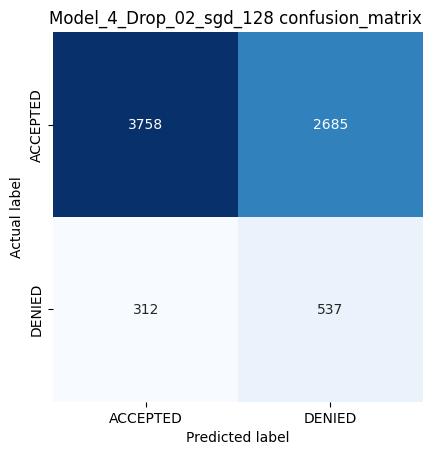

In [48]:
printConfusionMatrix(Model_4_Drop_02_sgd_128,x_test,y_test, name = "Model_4_Drop_02_sgd_128")

ACCURACY:         0.7109785079956055 
VAL ACCURACY:     0.5890016555786133 
VAL LOSS:         0.6748446226119995


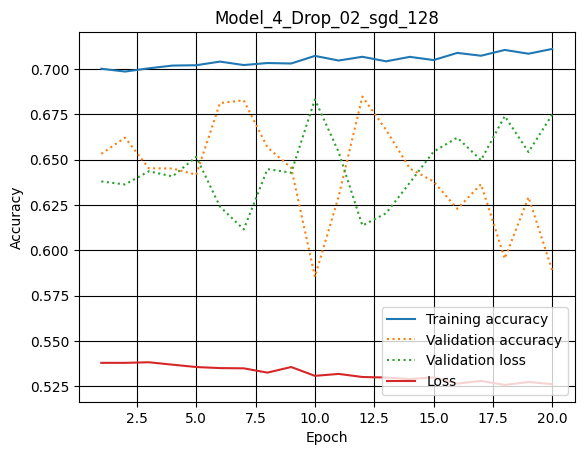

In [49]:
printGraph("Model_4_Drop_02_sgd_128", hist)

In [50]:
Model_4_Drop_02_sgd_128.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_A (Dense)             (None, 256)               3072      
                                                                 
 layer_B (Dense)             (None, 256)               65792     
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 layer_C (Dense)             (None, 256)               65792     
                                                                 
 layer_D (Dense)             (None, 256)               65792     
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                                 
 layer_E (Dense)             (None, 512)              

In [38]:
#model_4_B_copy_b.save("../saved_models/model_4_B_copy_b/")

In [39]:
#model_4_B_copy_c.save("../saved_models/model_4_B_copy_c/")
#model_4_B_copy_d.save("../saved_models/model_4_B_copy_d/")

====================================================================================================================================

STARTING OTHER NN MODELS HERE


#12 hidden layers
#256 nodes per player

In [40]:
#12 hidden layers
#256 nodes per player
# hist = model_4_B_1.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=32, verbose=1, callbacks=[callback])

In [41]:
# printGraph("Model_4_B_1 Graph", hist)

In [42]:
#printConfusionMatrix(model_4_B_1, x_test,y_test,name="Model_4_B_1 confusion matrix")